In [2]:
import sys
import pathlib
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../utils')
from utils import show_image, class_distribution, tf_bincount
%load_ext autoreload
%autoreload 2

# Jupyter-specific
%matplotlib inline

In [3]:
data_dir = pathlib.Path('/home/henriklg/master-thesis/data/hyper-kvasir/labeled_ttv/')


conf = {
    "num_classes": 23,
    "log_dir": ".",
    "img_shape": [128,128,3],
    "class_names": ['barretts-short-segment', 'retroflex-stomach', 'ulcerative-colitis-0-1',
 'ulcerative-colitis-grade-3', 'esophagitis-b-d', 'dyed-resection-margins',
 'hemorrhoids', 'normal-z-line', 'esophagitis-a', 'ulcerative-colitis-1-2',
 'barretts', 'bbps-2-3', 'ileum', 'bbps-0-1', 'impacted-stool', 'cecum',
 'ulcerative-colitis-grade-2', 'ulcerative-colitis-2-3', 'pylorus',
 'retroflex-rectum', 'ulcerative-colitis-grade-1', 'polyps',
 'dyed-lifted-polyps']
    }

In [4]:
split_0 = [1415, 1202, 1333, 1522, 1387, 1, 326, 48, 12324, 24212, 7962, 2703, 3850, 17984, 1590, 11104, 206, 1041, 0, 51, 1440, 5192, 2524]

split_1 = [326, 1829, 1478, 1526, 1884, 2, 2, 63, 12560, 22369, 9605, 3153, 2971, 16899, 1750, 10457, 160, 1034, 9, 86, 2961, 6183, 2200]

avg_split = []
for sp0, sp1 in zip(split_0, split_1):
    avg_split.append(int(round( (sp0+sp1)/2.0 )))

In [5]:
# convert from ds-paper to my order
# example 0 = barrets, barrets should be class 10
order_conversion = [16, 15, 17, 22, 12, 4, 5, 10, 11, 18, 0, 2, 6, 1, 7, 8, 21, 19, 9, 14, 20, 13, 3]

In [13]:
ds_dist = []

for order_idx in order_conversion:
    ds_dist.append(avg_split[order_idx])

In [78]:
def print_bar_chart(data, conf, title=None, fname=None, figsize=(15,6), label=None):
    """
    Takes in list of data and makes a bar chart of it.
    Dynamically allocates placement for bars.
    """
    x = np.arange(conf["num_classes"])
    width = 0.7      # 1.0 = bars side by side
    width = width/len(data)

    num_bars = len(data)
    if num_bars == 1:
        bar_placement = [0]
    # even number of bars
    elif (num_bars % 2) == 0:
        bar_placement = np.arange(-num_bars/2, num_bars/2+1)    #[-2, -1, 0, 1, 2]
        bar_placement = np.delete(bar_placement, num_bars//2)   #delete 0
        bar_placement = [bar+0.5 if bar<0 else bar-0.5 for bar in bar_placement]
    # odd number of bars
    else:
        bar_placement = np.arange(-np.floor(num_bars/2), np.floor(num_bars/2)+1)


    fig, ax = plt.subplots(figsize=figsize)

    rects = []
    for cnt, (dat, placement) in enumerate(zip(data, bar_placement)):
        if not label: 
            label='Iter {}'.format(cnt)
        rects.append(ax.bar(x+placement*width, dat, width, label=label[cnt]))

    ax.set_ylabel('Number of samples (normalized)')
    if title:
        title_string = title
        ax.set_title(title_string)
    ax.set_xticks(x)
    #ax.set_ylim(0,27000)
    ax.set_xticklabels(conf["class_names"])
    ax.set_axisbelow(True)
    ax.legend(loc='upper left');

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=25, ha="right",
                 rotation_mode="anchor")
    plt.grid(axis='y')

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = int(rect.get_height())
            ax.annotate('{}'.format(height),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')#, rotation='vertical')

#     autolabel(rects[0])
#     autolabel(rects[-1])

    fig.tight_layout()
    if fname:
        plt.savefig('{}/{}.pdf'.format(conf["log_dir"], fname), format='pdf')
    plt.show()

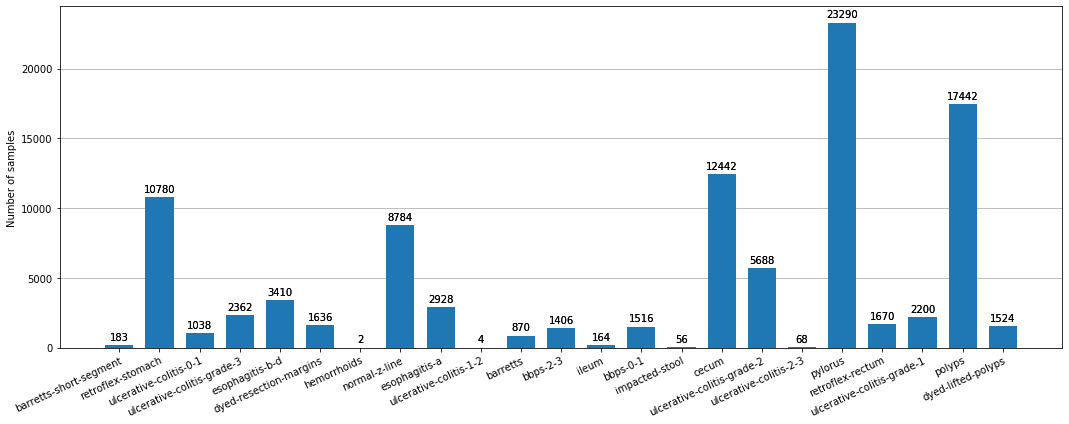

In [50]:
print_bar_chart(
    [ds_dist],
    conf,
    fname="paper_distribution",
    label=["Paper distribution"]
)

## Get a distribution from own system

In [9]:
import pickle

pickle_path = "/home/henriklg/master-thesis/code/hyper-kvasir/experiments/unlab_dist"
new_unlab = pickle.load (open (pickle_path+"/unlab_findings.pkl", "rb"))

In [10]:
lab_array = np.asarray(new_unlab["lab_list"], dtype=np.uint8)
own_dist = np.bincount(lab_array, minlength=int(conf["num_classes"]))

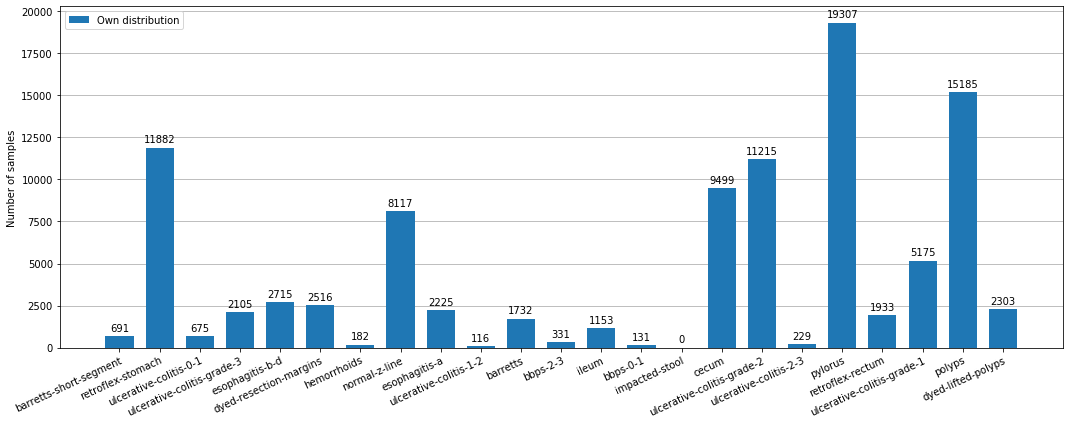

In [20]:
print_bar_chart(
    [own_dist],
    conf,
    fname="own_distribution",
    label=["Own distribution"]
)

## Both distributions

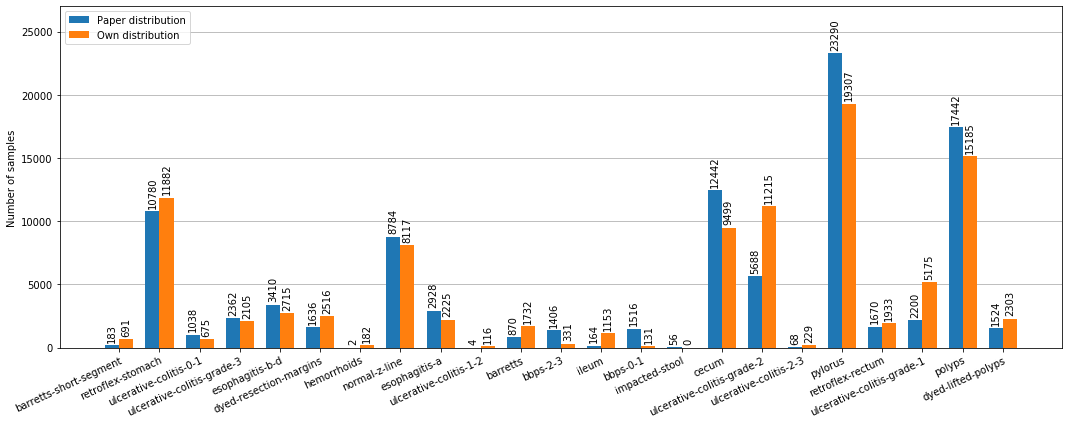

In [45]:
print_bar_chart(
    [ds_dist, own_dist],
    conf,
    fname="both_distributions",
    label=["Paper distribution", "Own distribution"]
)

## Normalize own distribution with number of labeled samples

In [70]:
def normalize(own_dist):
    dist_max = np.max(own_dist)
    dist_min = np.min(own_dist)
    new = [float(x-dist_min)/(dist_max-dist_min) for x in own_dist]
    return new

In [71]:
labeled = [53, 764, 35, 133, 260, 989, 6, 932, 403, 11, 41, 1148, 9, 646, 131, 1009, 443, 28, 999, 391, 201, 1028, 1002]

lab_norm = normalize(labeled)
    
print (lab_norm)

[0.04115586690017513, 0.6637478108581436, 0.025394045534150613, 0.11120840630472854, 0.2224168126094571, 0.8607705779334501, 0.0, 0.8108581436077058, 0.3476357267950963, 0.0043782837127845885, 0.03064798598949212, 1.0, 0.002626970227670753, 0.5604203152364273, 0.10945709281961472, 0.8782837127845884, 0.38266199649737304, 0.01926444833625219, 0.8695271453590193, 0.3371278458844133, 0.17075306479859895, 0.8949211908931699, 0.87215411558669]


In [72]:
own_norm = normalize(own_dist)

print (own_norm)

[0.03579012793287409, 0.6154244574506655, 0.0349614129590304, 0.10902781374630963, 0.14062257212410006, 0.13031542963691925, 0.0094266328274719, 0.42041746516807377, 0.11524317605013726, 0.0060081835603667064, 0.08970839591857875, 0.017144041021391204, 0.059719272802610454, 0.0067851038483451595, 0.0, 0.49199772103382194, 0.580877401978557, 0.011860983063137723, 1.0, 0.10011912777749003, 0.26803749935256643, 0.786502304863521, 0.11928316154762521]


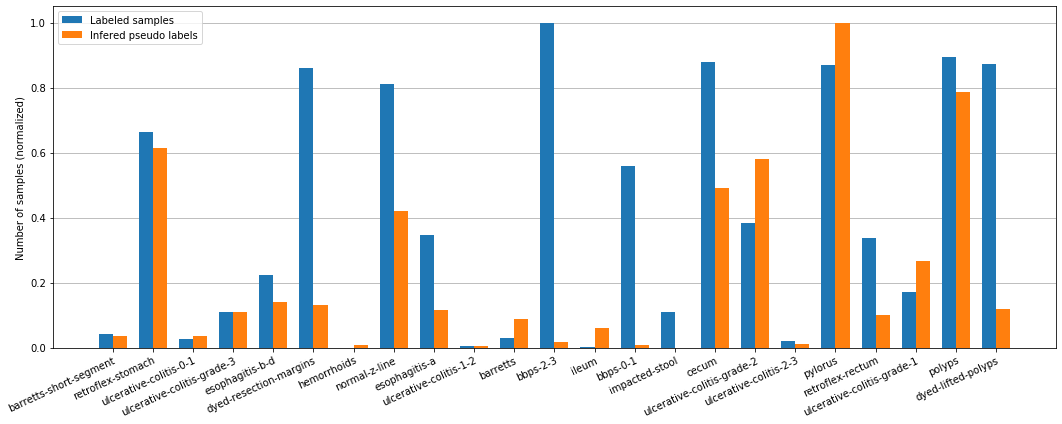

In [79]:
print_bar_chart(
    [lab_norm, own_norm],
    conf,
    fname="normalized",
    label=["Labeled samples", "Infered pseudo labels"]
)